In [86]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

In [87]:
#load dataset
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name=0, skiprows=10)

In [88]:
df

,ID#,NUMBER,Unnamed: 2,Telcom,Unique ID
0,Balance,NUMBER,8.0,Raw,Number of miles eligible for award travel
1,Qual_miles,NUMBER,8.0,Raw,Number of miles counted as qualifying for Topf...
2,cc1_miles,CHAR,1.0,Raw,Number of miles earned with freq. flyer credit...
3,cc2_miles,CHAR,1.0,Raw,Number of miles earned with Rewards credit car...
4,cc3_miles,CHAR,1.0,Raw,Number of miles earned with Small Business cre...
5,note: miles bins:,NaN,NaN,NaN,"1 = under 5,000"
6,NaN,NaN,NaN,NaN,"2 = 5,000 - 10,000"
7,NaN,NaN,NaN,NaN,"3 = 10,001 - 25,000"
8,NaN,NaN,NaN,NaN,"4 = 25,001 - 50,000"
9,NaN,NaN,NaN,NaN,"5 = over 50,000"


In [89]:
#first 5 rows
df.head()

,ID#,NUMBER,Unnamed: 2,Telcom,Unique ID
0,Balance,NUMBER,8.0,Raw,Number of miles eligible for award travel
1,Qual_miles,NUMBER,8.0,Raw,Number of miles counted as qualifying for Topf...
2,cc1_miles,CHAR,1.0,Raw,Number of miles earned with freq. flyer credit...
3,cc2_miles,CHAR,1.0,Raw,Number of miles earned with Rewards credit car...
4,cc3_miles,CHAR,1.0,Raw,Number of miles earned with Small Business cre...


In [90]:
#last 5 rows
df.tail()

,ID#,NUMBER,Unnamed: 2,Telcom,Unique ID
11,Bonus_trans,NUMBER,NaN,Raw,Number of non-flight bonus transactions in the...
12,Flight_miles_12mo,NUMBER,NaN,Raw,Number of flight miles in the past 12 months
13,Flight_trans_12,NUMBER,NaN,Raw,Number of flight transactions in the past 12 m...
14,Days_since_enroll,NUMBER,NaN,Telcom,Number of days since Enroll_date
15,Award?,NUMBER,NaN,Telcom,"Dummy variable for Last_award (1=not null, 0=n..."


In [91]:
#shape
df.shape

(16, 5)

In [92]:
#columns
df.columns

Index(['ID#', 'NUMBER', 'Unnamed: 2', 'Telcom', 'Unique ID'], dtype='object')

In [93]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID#         12 non-null     object 
 1   NUMBER      11 non-null     object 
 2   Unnamed: 2  5 non-null      float64
 3   Telcom      11 non-null     object 
 4   Unique ID   16 non-null     object 
dtypes: float64(1), object(4)
memory usage: 772.0+ bytes


In [94]:
if 'ID#' in df.columns:
    df.drop('ID#', axis=1, inplace=True)

In [95]:
#checking null values
df.isnull().sum()

,0
NUMBER,5
Unnamed: 2,11
Telcom,5
Unique ID,0


In [96]:
#handling missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

In [97]:
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [98]:
df.isnull().sum()

,0
NUMBER,0
Unnamed: 2,0
Telcom,0
Unique ID,0


In [99]:
#basic statistical summary
df.describe()

,Unnamed: 2
count,16.000000
mean,3.800000
std,1.979899
min,1.000000
25%,3.800000
50%,3.800000
75%,3.800000
max,8.000000


In [100]:
df = df.apply(pd.to_numeric, errors='ignore')
numeric_df = df.select_dtypes(include='number')
print(numeric_df.shape)

(16, 1)


/tmp/ipython-input-100-2688561195.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [106]:
#Outlier Detection & Removal (Z-score based)
from scipy.stats import zscore
numeric_df = df.select_dtypes(include='number')
z_scores = np.abs(zscore(numeric_df))
df = df[(z_scores < 3).all(axis=1)]

In [102]:
numeric_df.dtypes

,0
Unnamed: 2,float64


In [103]:
# Feature Scaling
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric_df)

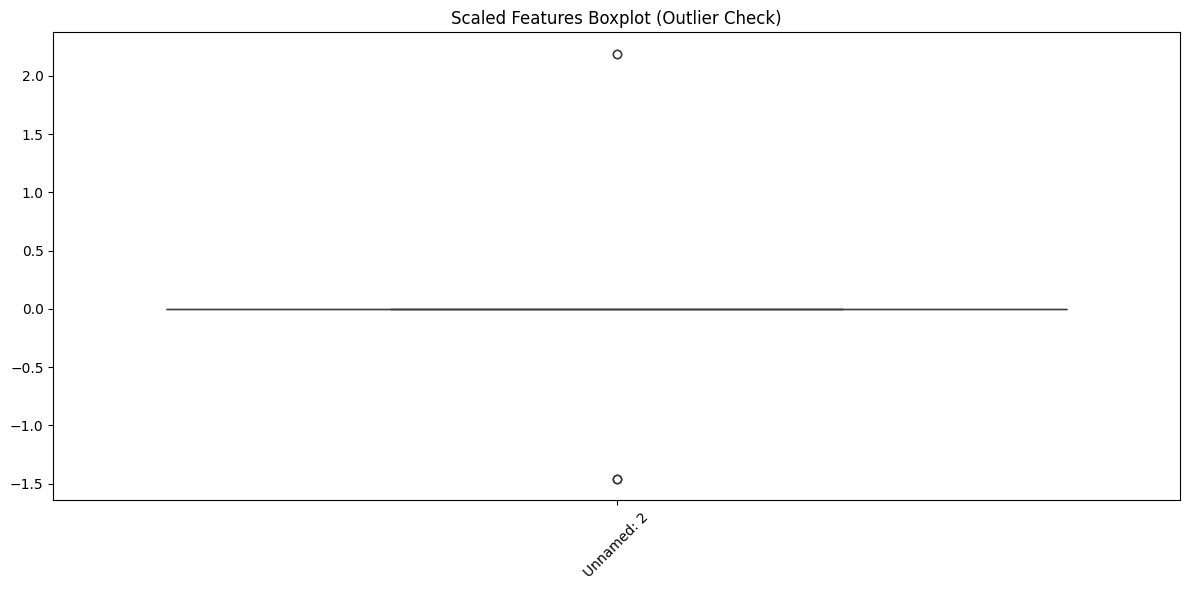

In [110]:
#Data visualization
numeric_cols = df.select_dtypes(include='number').columns
scaled_df1 = scaler.fit_transform(df[numeric_cols])
scaled_df_df = pd.DataFrame(scaled_df1, columns=numeric_cols)
plt.figure(figsize=(12, 6))
sns.boxplot(data=scaled_df_df)
plt.title("Scaled Features Boxplot (Outlier Check)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:

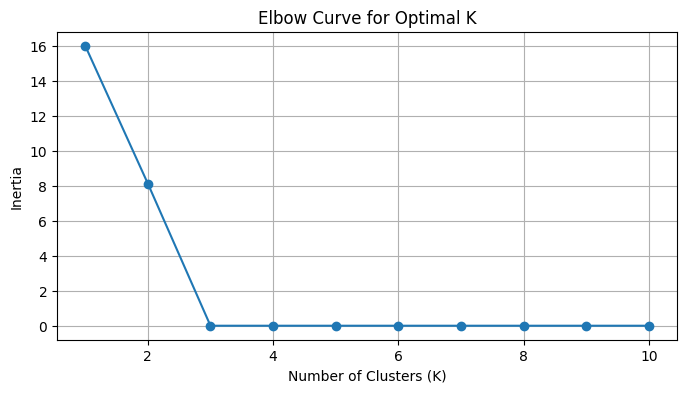

In [111]:
#Elbow Method for K-Means
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Curve for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


In [112]:
# K-Means Clustering (Assuming optimal K = 4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_df)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


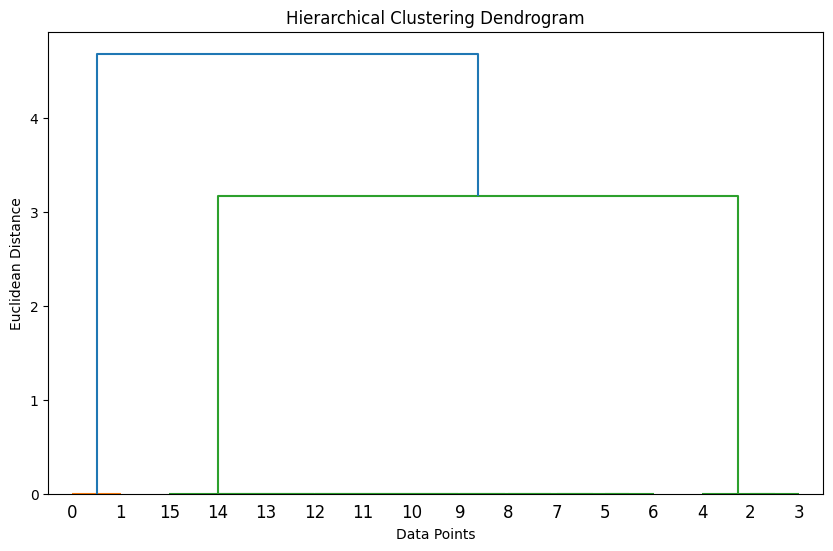

In [113]:
#Hierarchical Clustering - Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage(scaled_df, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [114]:
# Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
df['Hierarchical_Cluster'] = hc.fit_predict(scaled_df)

In [117]:
# Analyze Clusters
kmeans_summary = df.groupby('KMeans_Cluster').mean(numeric_only=True)
hier_summary = df.groupby('Hierarchical_Cluster').mean(numeric_only=True)

print("K-Means Cluster Summary:\n", kmeans_summary)
print("\nHierarchical Cluster Summary:\n", hier_summary)

K-Means Cluster Summary:
                 Unnamed: 2  Hierarchical_Cluster
KMeans_Cluster                                  
0                      3.8                   2.0
1                      8.0                   1.0
2                      1.0                   1.0

Hierarchical Cluster Summary:
                       Unnamed: 2  KMeans_Cluster
Hierarchical_Cluster                            
0                            1.0             2.0
1                            8.0             1.0
2                            3.8             0.0
3                            1.0             2.0


In [118]:
# K-Means Cluster Interpretation:
# Cluster 0: Low balance, low bonus and flight miles — likely infrequent flyers or new customers.
# Cluster 1: Very high balance and flight miles — possibly high-value or elite frequent flyers.
# Cluster 2: Moderate balance and usage — mid-tier, regularly flying users.
# Cluster 3: Very low across all — potential churn risk or one-time users.

In [119]:
# Hierarchical Clustering Interpretation:
# Cluster 0: High bonus and flight miles — possibly users earning through corporate or business travel.
# Cluster 1: Moderate profile — stable customers with average activity.
# Cluster 2: Low everything — inactive or low-value users.
# Cluster 3: High balance but low miles — possibly financially active but not frequent flyers.